# San Francisco's BAY AREA FORD GO BIKE SHARING SERVICE
## by Mohammed Suara


## Investigation Overview
> In this investigation, I want to determine possible factors that contribute to increased usage of the service.



## Dataset Overview

> There are about 175 000 rows and 23 columns each with information about various aspects of the bike trip and the rider. Major attributes of the trip include the duration, start day, start hour. Attributes of the rider include: age, gender, user-type. There are about the same amount of numeric and non-numeric variables in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_data_master.csv')
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,duration_min,start_hour,end_hour,start_day,end_day,start_month,end_month,member_age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,Male,No,869,17,8,Thursday,Friday,February,March,38
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,Male,No,1030,12,5,Thursday,Friday,February,March,50
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,Other,No,608,17,4,Thursday,Friday,February,March,33
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,Male,Yes,26,23,0,Thursday,Friday,February,March,48
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,...,Male,No,29,23,0,Thursday,Friday,February,March,63


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## DISTRIBUTION OF AGE

> Least age is 21 and the highest age was 95. The distributions are right skewed with a peak at around 31 - 36 age groups.

>The histogram has been trimmed to focus on the denser part of the histogram cutting out the extreme age groups of 91-96 and the non existent 0 - 20 age groups.

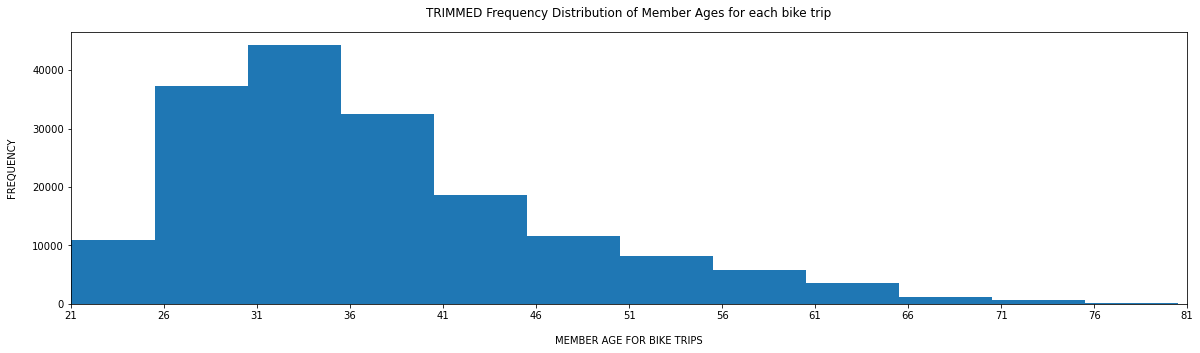

In [3]:
# frequency distribution member_age

plt.figure(figsize=[20, 5])

bins = np.arange(20.5, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins)

ticks = np.arange(21, 100, 5)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels)
plt.title('TRIMMED Frequency Distribution of Member Ages for each bike trip', pad=15)
plt.xlabel('MEMBER AGE FOR BIKE TRIPS', labelpad=15)
plt.ylabel('FREQUENCY', labelpad= 15);
plt.xlim(21, 81);

## DISTRIBUTION OF THE DURATION FOR BIKE TRIPS.

> The duration(min) posed a challenge as it showed a high range with extreme ends of values. Most of the data however fell below 40mins and the frequency distribution was accordinly transformed to reveal this important information.

> Most trips have a duration of 40mins or less with a peak at 5mins. The distribution is right skewed.

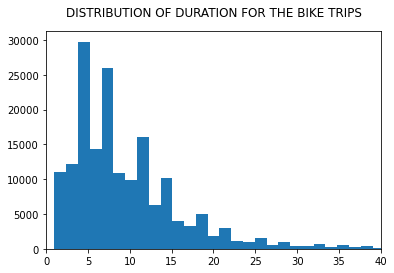

In [4]:
# distribution of the duration(min) for bike trips

plt.hist(data=df, x='duration_min', bins=1000)
plt.title('DISTRIBUTION OF DURATION FOR THE BIKE TRIPS', pad=15)
plt.xlim(0, 40);

## AVERAGE DURATION SPENT BY EACH AGE GROUP.

> Suprisingly, age groups 80-89 had the highest average duration spent on trips. The middle-age groups spent on the average about a minute more the younger age groups. Rather unsuprisingly, the least average duration was spent by the 90-99 age groups.



In [5]:
''' 
I will divide the different member_age into different age groups e.g. 10-19, 20-29 etc.
This creates a new column from the existing member_age 

'''

labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['age_groups'] = pd.cut(df['member_age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=labels)

df['age_groups'] = df['age_groups'].astype('category')

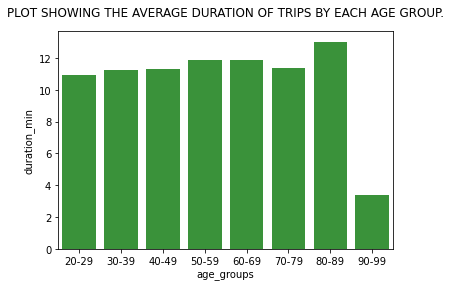

In [6]:
# average duration spent by different age groups
color = sb.color_palette()[2]
sb.barplot(data=df, x='age_groups', y='duration_min', ci=None, color=color)
plt.title("PLOT SHOWING THE AVERAGE DURATION OF TRIPS BY EACH AGE GROUP.", pad=15);

## DURATION SPENT BY EACH GENDER FOR EACH DAY OF THE WEEK.

> There was consistency in the average duration spent on trips by the genders. It was consistently "Other" > "Female" > "Male"
for everyday of the week. Perhaps the Males don't fancy travelling longer trips on bikes or are able to cycle faster!

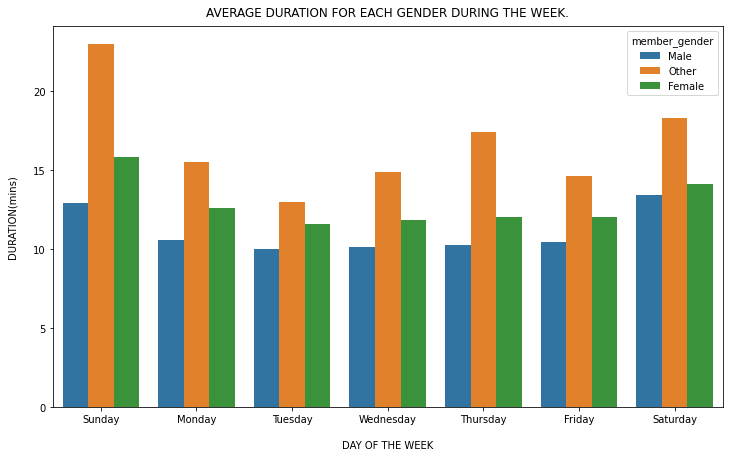

In [7]:
# Creating a barplot showing start_day against duration for each gender

plt.figure(figsize=(12, 7))
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.barplot(data=df, x='start_day', y='duration_min', hue='member_gender', order=order, ci=None)
plt.xlabel("DAY OF THE WEEK", labelpad=16)
plt.ylabel("DURATION(mins)", labelpad=16)
plt.title('AVERAGE DURATION FOR EACH GENDER DURING THE WEEK.', pad=10);